# The Kolmogorov-Smirnov p-value

In this example, we illustrate the calculation of the Kolmogorov-Smirnov p-value. 

* We generate a sample from a gaussian distribution. 
* We create a Uniform distribution with known parameters.
* The Kolmogorov-Smirnov statistics is computed and plot on the empirical cumulated distribution function.
* We plot the p-value as the area under the part of the curve exceeding the observed statistics.

In [1]:
import openturns as ot

We generate a sample from a standard gaussian distribution.

In [2]:
dist = ot.Normal()
samplesize = 10
sample = dist.getSample(samplesize)

In [3]:
testdistribution = ot.Normal()
result = ot.FittingTest.Kolmogorov(sample, testdistribution, 0.01)

In [4]:
pvalue = result.getPValue()
pvalue

0.5520956737074482

In [5]:
KSstat = result.getStatistic()
KSstat

0.23684644362352725

Compute exact Kolmogorov PDF.

Create a function which returns the CDF given the KS distance. 

In [6]:
def pKolmogorovPy(x):
    y=ot.DistFunc_pKolmogorov(samplesize,x[0])
    return [y]

In [7]:
pKolmogorov = ot.PythonFunction(1,1,pKolmogorovPy)

Create a function which returns the KS PDF given the KS distance: use the `gradient` method.

In [8]:
def kolmogorovPDF(x):
    return pKolmogorov.gradient(x)[0,0]

In [9]:
def dKolmogorov(x,samplesize):
    """
    Compute Kolmogorov PDF for given x.
    x : a Sample, the points where the PDF must be evaluated
    samplesize : the size of the sample
    Reference
    Numerical Derivatives in Scilab, Michael Baudin, May 2009
    """
    n=x.getSize()
    y=ot.Sample(n,1)
    for i in range(n):
        y[i,0] = kolmogorovPDF(x[i])
    return y

In [10]:
def linearSample(xmin,xmax,npoints):
    '''Returns a sample created from a regular grid 
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

In [11]:
n = 1000 # Number of points in the plot
s = linearSample(0.001,0.999,n)
y = dKolmogorov(s,samplesize)

In [12]:
def drawInTheBounds(vLow,vUp,n_test):
    '''
    Draw the area within the bounds.
    '''
    palette = ot.Drawable.BuildDefaultPalette(2)
    myPaletteColor = palette[1]
    polyData = [[vLow[i], vLow[i+1], vUp[i+1], vUp[i]] for i in range(n_test-1)]
    polygonList = [ot.Polygon(polyData[i], myPaletteColor, myPaletteColor) for i in range(n_test-1)]
    boundsPoly = ot.PolygonArray(polygonList)
    return boundsPoly

Create a regular grid starting from the observed KS statistics.

In [13]:
nplot = 100
x = linearSample(KSstat,0.6,nplot)

Compute the bounds to fill: the lower vertical bound is zero and the upper vertical bound is the KS PDF.

In [14]:
vLow = [[x[i,0],0.] for i in range(nplot)] 
vUp = [[x[i,0],pKolmogorov.gradient(x[i])[0,0]] for i in range(nplot)]

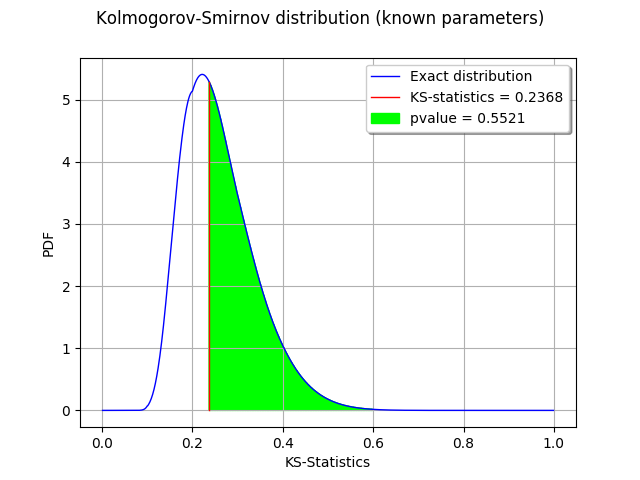

In [15]:
boundsPoly = drawInTheBounds(vLow,vUp,nplot)
boundsPoly.setLegend("pvalue = %.4f" % (pvalue))
curve = ot.Curve(s,y)
curve.setLegend("Exact distribution")
curveStat = ot.Curve([KSstat,KSstat],[0.,kolmogorovPDF([KSstat])])
curveStat.setColor("red")
curveStat.setLegend("KS-statistics = %.4f" % (KSstat))
graph = ot.Graph('Kolmogorov-Smirnov distribution (known parameters)', 'KS-Statistics', 'PDF', True, 'topright')
graph.setLegends(["Empirical distribution"])
graph.add(curve)
graph.add(curveStat)
graph.add(boundsPoly)
graph.setTitle("Kolmogorov-Smirnov distribution (known parameters)")
graph

We observe that the p-value is the area of the curve which corresponds to the KS distances greater than the observed KS statistics.